In [1]:
#reload source files automatically
%load_ext autoreload
%autoreload 2

In [2]:
import sklearn
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import sklearn
import sklearn.neighbors
import sklearn.metrics
from __future__ import print_function

from lime_time_series import *

In [3]:
# read dataset
train = pd.read_csv('time_series/Trace_TRAIN', header=None)
test = pd.read_csv('time_series/Trace_TEST', header=None)
train = train[train[0]>2].reset_index().drop(['index'], axis=1)
test = test[test[0]>2].reset_index().drop(['index'], axis=1)

Y_columns = [0]
Y_train = train[Y_columns]
X_train = train.drop(Y_columns, axis=1)
Y_test = test[Y_columns]
X_test = test.drop(Y_columns, axis=1)

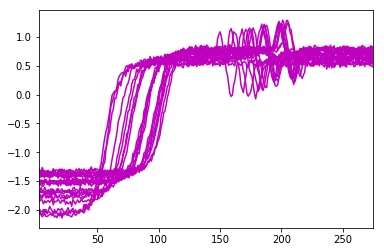

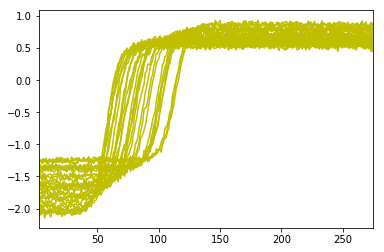

In [4]:
#train[train[0]==1].transpose()[1:].plot(legend=False, color='k')
#plt.show()
#train[train[0]==2].transpose()[1:].plot(legend=False, color='c')
#plt.show()
train[train[0]==3].transpose()[2:].plot(legend=False, color='m')
plt.show()
train[train[0]==4].transpose()[2:].plot(legend=False, color='y')
plt.show()
#test[test[0]==1].transpose()[1:].plot(legend=False, color='y')
#plt.show()

In [5]:
def DTWDistance(s1, s2):
    DTW={}

    for i in range(len(s1)):
        DTW[(i, -1)] = float('inf')
    for i in range(len(s2)):
        DTW[(-1, i)] = float('inf')
    DTW[(-1, -1)] = 0

    for i in range(len(s1)):
        for j in range(len(s2)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])

    return math.sqrt(DTW[len(s1)-1, len(s2)-1])

In [6]:
def DTWDistance_windowed(s1, s2):
    DTW={}

    w = max(10, abs(len(s1)-len(s2)))

    for i in range(-1,len(s1)):
        for j in range(-1,len(s2)):
            DTW[(i, j)] = float('inf')
    DTW[(-1, -1)] = 0

    for i in range(len(s1)):
        for j in range(max(0, i-w), min(len(s2), i+w)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])

    return math.sqrt(DTW[len(s1)-1, len(s2)-1])

In [7]:
kNN = sklearn.neighbors.KNeighborsClassifier(metric=DTWDistance_windowed)
kNN.fit(X_train, Y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30,
           metric=<function DTWDistance_windowed at 0x7f935ffbb2f0>,
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [8]:
pred = kNN.predict(X_test[0:10])

In [9]:
pred

array([3, 3, 3, 4, 3, 4, 3, 3, 4, 3])

In [10]:
sklearn.metrics.accuracy_score(Y_test[0:10].values.ravel(), pred)

0.90000000000000002

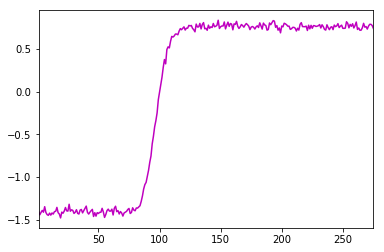

In [17]:
test_series_index = 3
instance_to_predict = X_test.iloc[test_series_index]
instance_to_predict.plot(legend=False, color='m')
plt.show()

In [18]:
explainer = LimeTimeSeriesExplainer()

FEATURE 1:


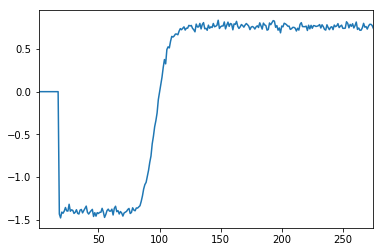

FEATURE 2:


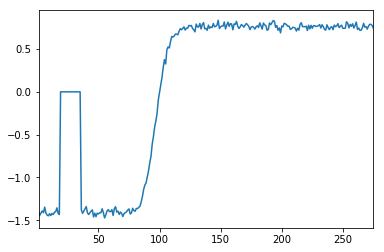

FEATURE 3:


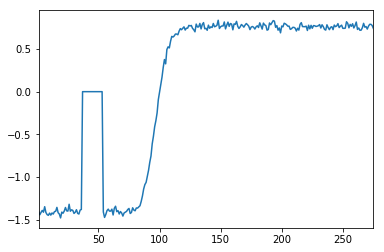

FEATURE 4:


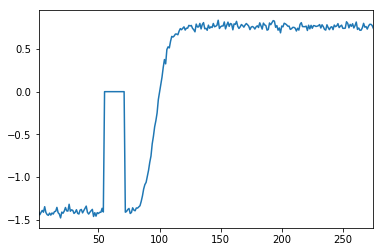

FEATURE 5:


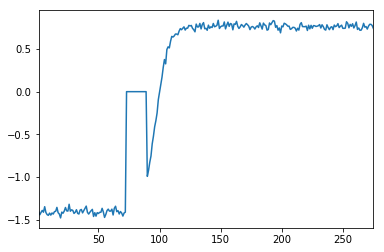

FEATURE 6:


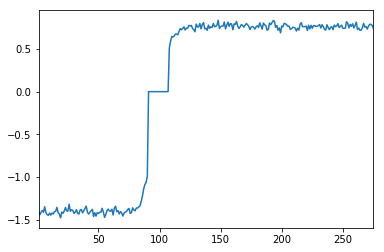

FEATURE 7:


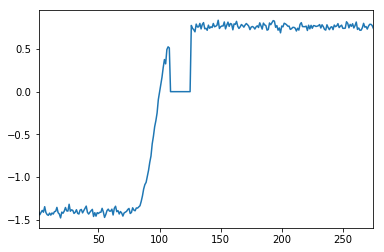

FEATURE 8:


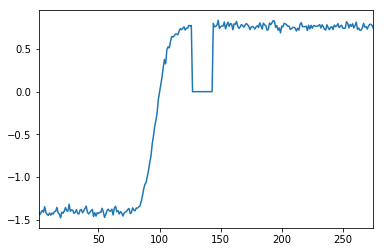

FEATURE 9:


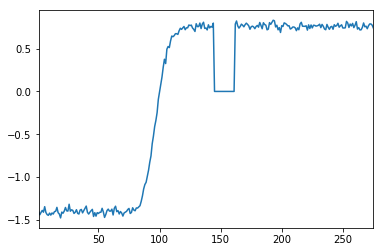

FEATURE 10:


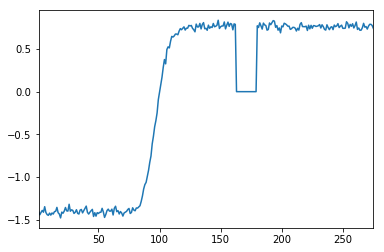

FEATURE 11:


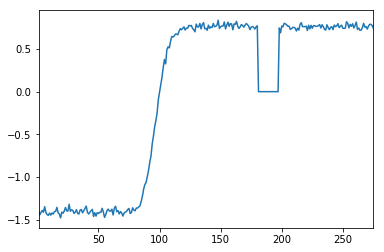

FEATURE 12:


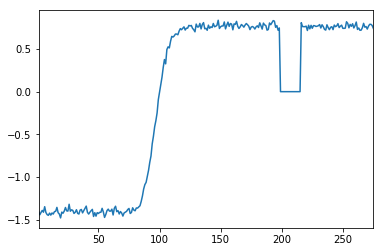

FEATURE 13:


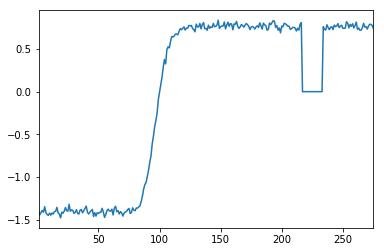

FEATURE 14:


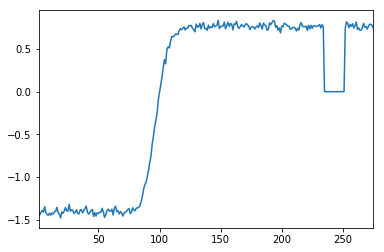

FEATURE 15:


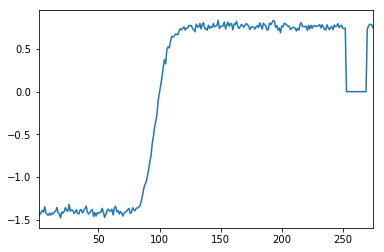

[ 2  8  8  3 12 11  7 12 10  1  1  8 12  4 10  3  1  4  3  8  7  2  8  1  4
  1  4  1 12 11 13 13  7  1  3  8  8  3 12 13 11  3  6  6  2  5  6  7 11]
[[ 0.   1. ]
 [ 0.   1. ]
 [ 0.2  0.8]
 [ 1.   0. ]
 [ 0.8  0.2]
 [ 0.6  0.4]
 [ 0.2  0.8]
 [ 0.8  0.2]
 [ 1.   0. ]
 [ 1.   0. ]
 [ 0.2  0.8]
 [ 0.   1. ]
 [ 1.   0. ]
 [ 1.   0. ]
 [ 0.2  0.8]
 [ 1.   0. ]
 [ 0.   1. ]
 [ 0.   1. ]
 [ 1.   0. ]
 [ 0.   1. ]
 [ 0.4  0.6]
 [ 0.8  0.2]
 [ 1.   0. ]
 [ 1.   0. ]
 [ 0.   1. ]
 [ 0.2  0.8]
 [ 0.4  0.6]
 [ 0.4  0.6]
 [ 0.8  0.2]
 [ 0.4  0.6]
 [ 1.   0. ]
 [ 0.4  0.6]
 [ 1.   0. ]
 [ 0.8  0.2]
 [ 1.   0. ]
 [ 0.4  0.6]
 [ 1.   0. ]
 [ 1.   0. ]
 [ 0.4  0.6]
 [ 0.4  0.6]
 [ 1.   0. ]
 [ 0.8  0.2]
 [ 0.2  0.8]
 [ 0.   1. ]
 [ 1.   0. ]
 [ 0.   1. ]
 [ 0.4  0.6]
 [ 0.6  0.4]
 [ 1.   0. ]
 [ 0.6  0.4]]
[  2.22044605e-14   6.90506637e+00   3.16869949e+01   3.16869949e+01
   1.05572809e+01   5.52786405e+01   4.83602221e+01   2.69703257e+01
   5.52786405e+01   4.22649731e+01   3.39082169e+00   3.39082

In [19]:
 exp = explainer.explain_instance(X_test.iloc[[test_series_index]], kNN.predict_proba, num_features=15, num_ranges=15, num_samples=50)
print('Series id: %d' % test_series_index)
print('Probabilities: ', kNN.predict_proba([X_test.iloc[test_series_index]]))
print('True class: %s' % Y_test.iloc[test_series_index, 0])

In [20]:
features = exp.as_list()
features.sort(key=lambda x: x[1], reverse=True)
print(features)

[(11, 0.45499466176637055), (10, 0.2863662453622457), (12, 0.27210585228327822), (9, 0.062511829426608448), (4, 0.045173553943758778), (13, 0.016162769163271223), (8, 0.015136746552594295), (3, 0.012550972832560828), (5, -0.0073876809353676746), (0, -0.026010238591429639), (14, -0.027992403620441451), (6, -0.051555355903385239), (7, -0.054237294542039634), (1, -0.066105480741004988), (2, -0.10246226594524195)]
